PROJECT PRESENTATION LINK:https://drive.google.com/file/d/1jlJGn6nfm7P816TasMYDDrg_fRFbyO8w/view?usp=share_link

#IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as skl
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import metrics

#IMPORTING DATA

In [ ]:
df=pd.read_excel("/content/star_classificationf.xlsx")
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


#CLEANING DATA

In [ ]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
df.iloc[:,17]
for i in range(df.shape[1]):
  print(df.iloc[:,i].unique())
  print(df.iloc[:,i].value_counts())

[1.23766096e+18 1.23766488e+18 1.23766096e+18 ... 1.23767948e+18
 1.23766830e+18 1.23766115e+18]
1.237663e+18    22
1.237663e+18    22
1.237663e+18    20
1.237657e+18    18
1.237659e+18    18
                ..
1.237658e+18     1
1.237670e+18     1
1.237651e+18     1
1.237671e+18     1
1.237661e+18     1
Name: obj_ID, Length: 59600, dtype: int64
[135.6891066  144.82610055 142.18878956 ... 224.58740744 212.26862112
 196.89605297]
34.749600     2
135.689107    1
122.736311    1
28.449613     1
216.355348    1
             ..
247.814114    1
177.365643    1
169.790588    1
203.915984    1
196.896053    1
Name: alpha, Length: 99999, dtype: int64
[32.49463184 31.27418489 35.58244418 ... 15.70070739 46.66036528
 49.46464277]
-0.601931     2
 32.494632    1
 37.973185    1
 6.153946     1
 45.335889    1
             ..
 54.546378    1
 2.275880     1
 34.816656    1
 34.287705    1
 49.464643    1
Name: delta, Length: 99999, dtype: int64
[23.87882 24.77759 25.26307 ... 21.16916 25.35039 22.6

In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
df.drop(df[(df['class'] =='QSO')].index, inplace=True)

In [ ]:
df['class'].replace("GALAXY",0,inplace= True)
df['class'].replace("STAR",1,inplace= True)

In [ ]:
df.head(30)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,0,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,0,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,1,-0.000008,2444,54082,232
10,1.237680e+18,328.092076,18.220310,25.77163,22.52042,20.63884,19.78071,19.05765,8102,301,3,27,5.652162e+18,0,0.459596,5020,55852,525
11,1.237662e+18,243.986637,25.738280,23.76761,23.79969,20.98318,19.80745,19.45579,3927,301,4,112,5.322364e+18,0,0.591409,4727,55693,855


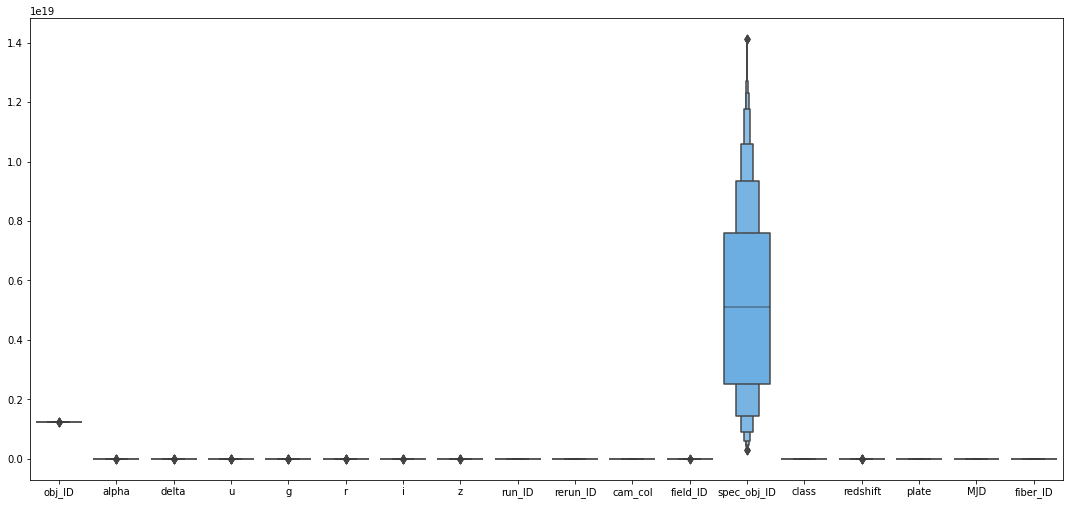

In [ ]:
plt.rcParams["figure.figsize"] = [18.50, 8.50]
out=sns.boxenplot(data=df)

#EXPLORATORY DATA ANALYSIS

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


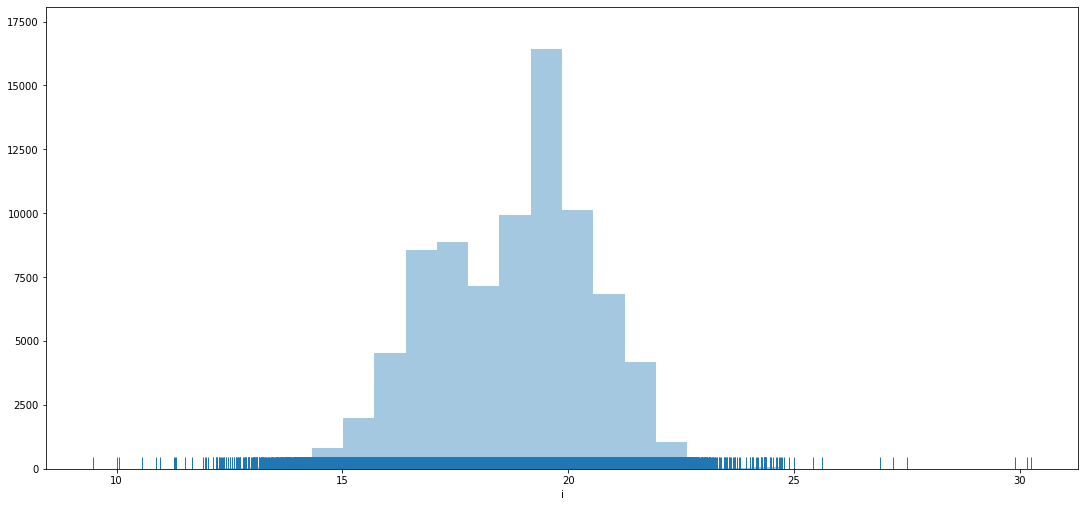

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
   
iu=df['i'].dropna()
sns.distplot(iu,bins=30,kde=False, rug=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


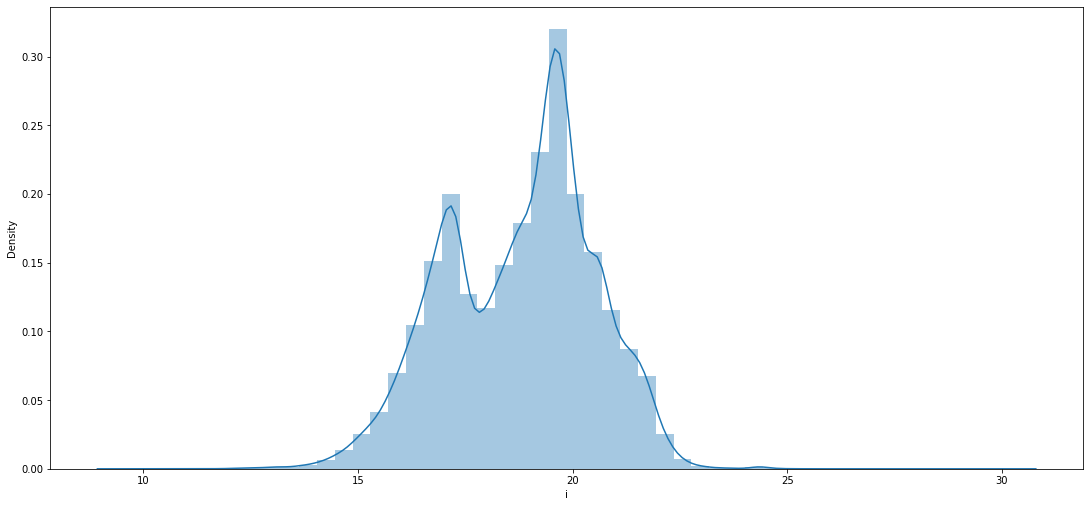

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

age=df['i'].dropna()
sns.distplot(age)         
plt.show()

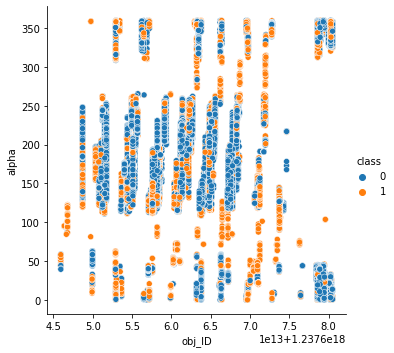

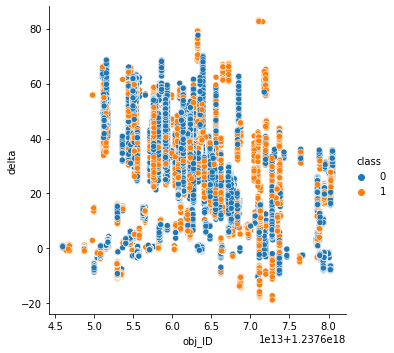

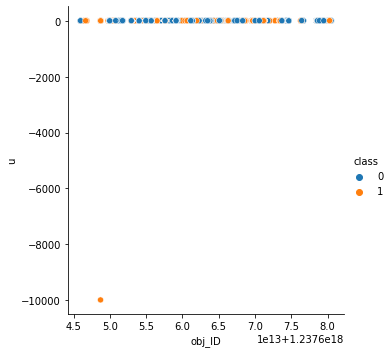

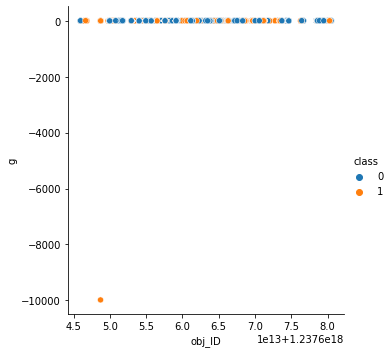

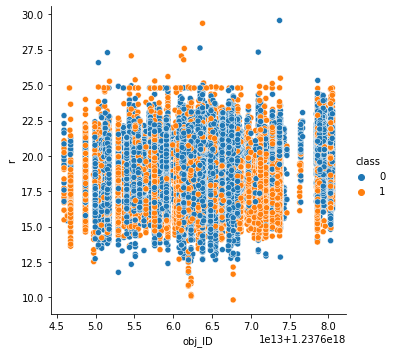

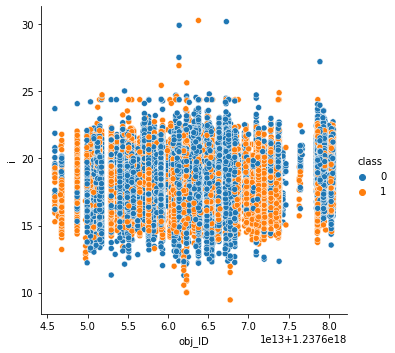

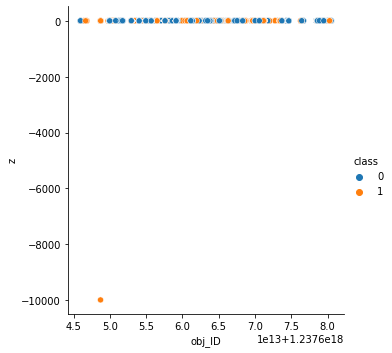

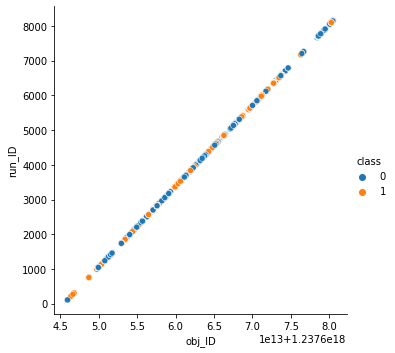

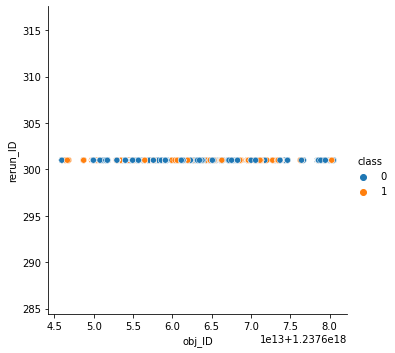

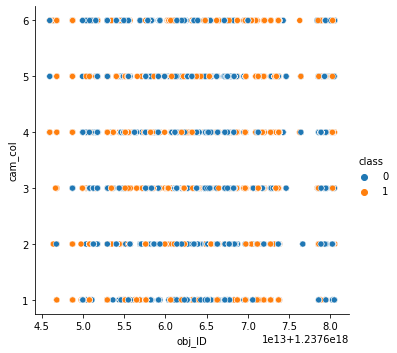

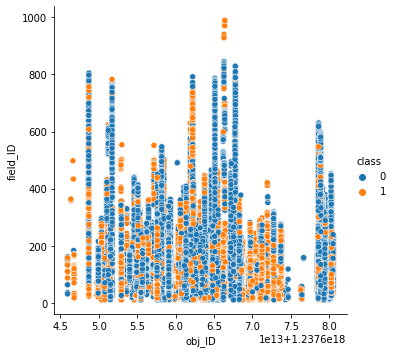

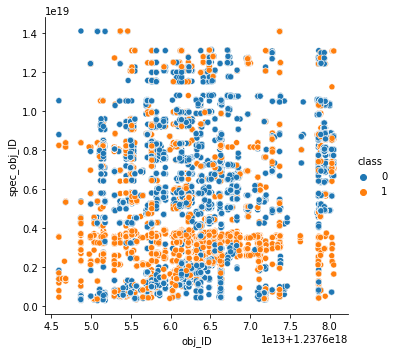

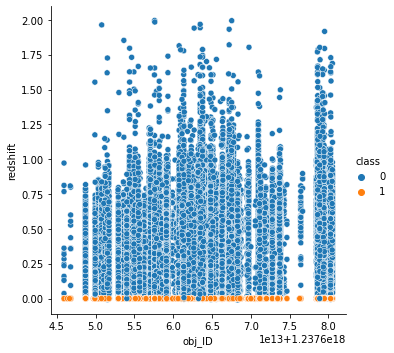

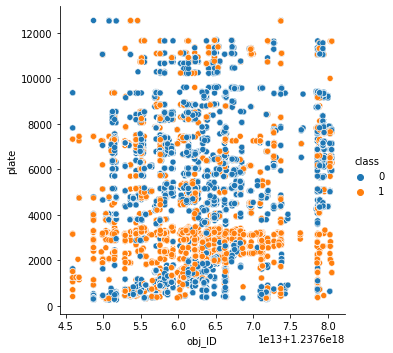

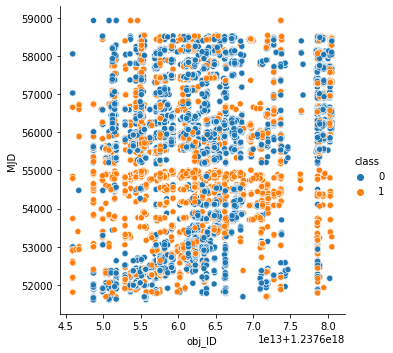

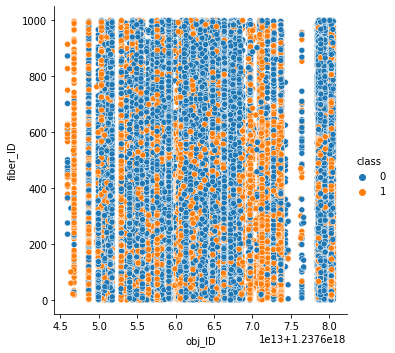

In [ ]:
plots=[]
for i in ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']:
    g=sns.relplot(data=df,x='obj_ID', y=i, hue='class')
    plots.append(g);

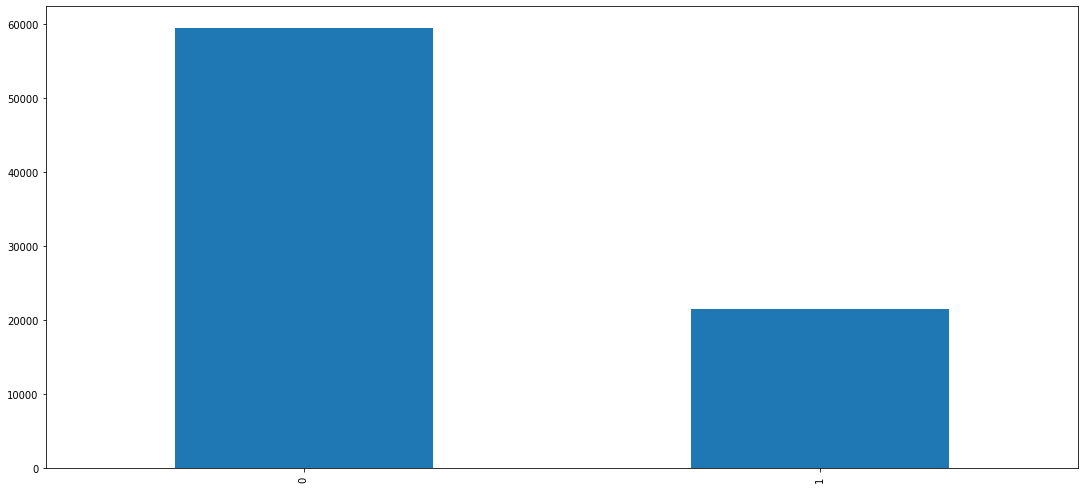

In [ ]:
df['class'].value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(*args, **kw)>

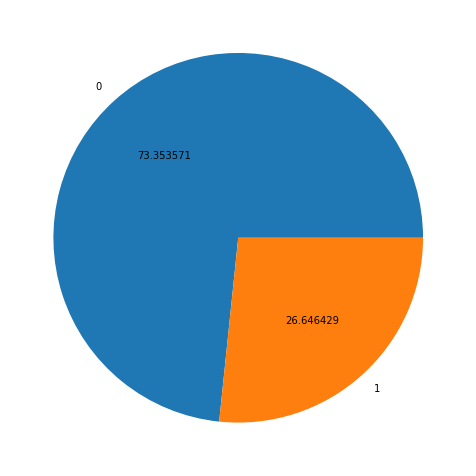

In [ ]:
c=df.groupby("class")["class"].count()
plt.pie(c,labels=c.index,autopct="%3f")
plt.show


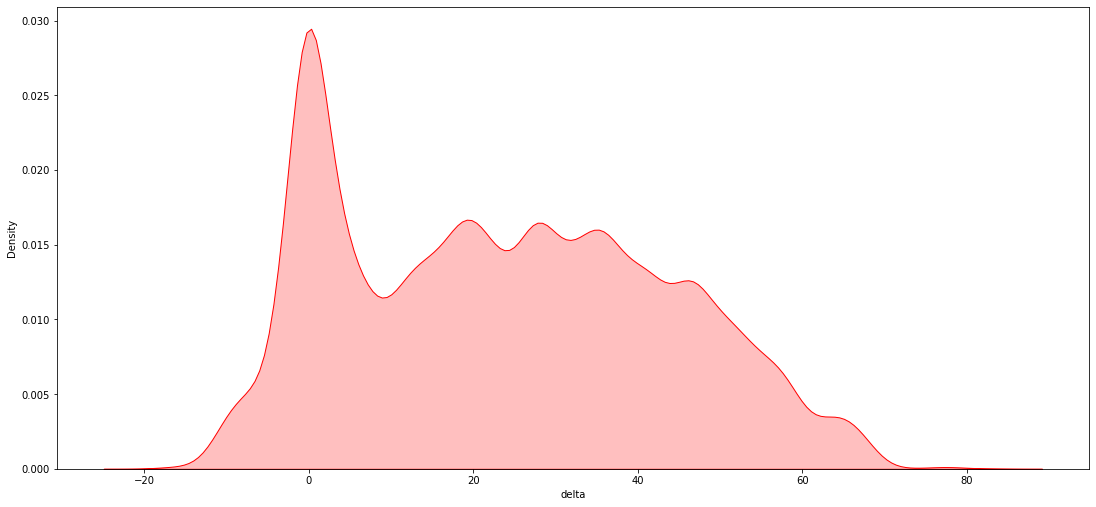

In [ ]:
res = sns.kdeplot(df['delta'], color='red', shade='True')
plt.show()

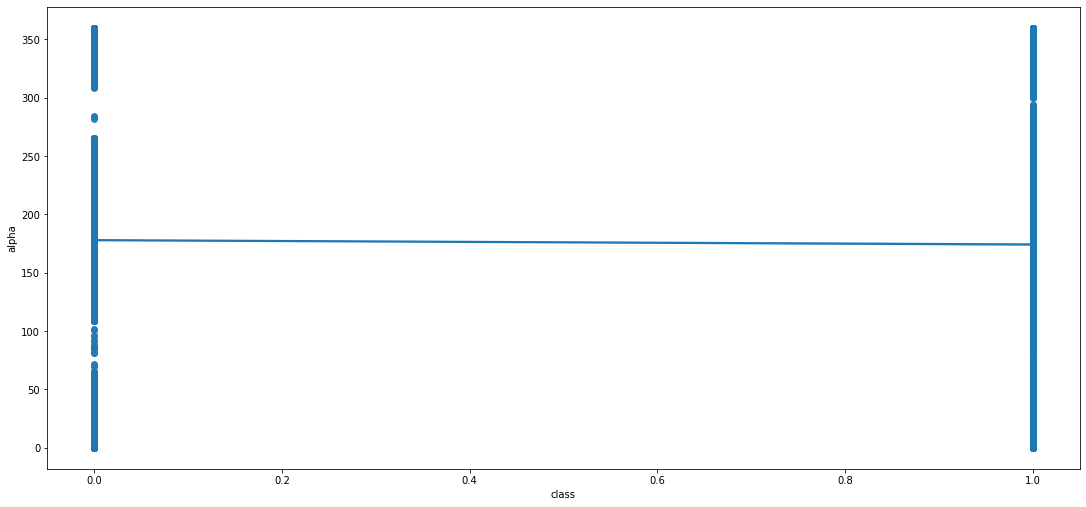

In [ ]:
sns.regplot(x = "class", 
            y = "alpha", 
            data = df)
plt.show()

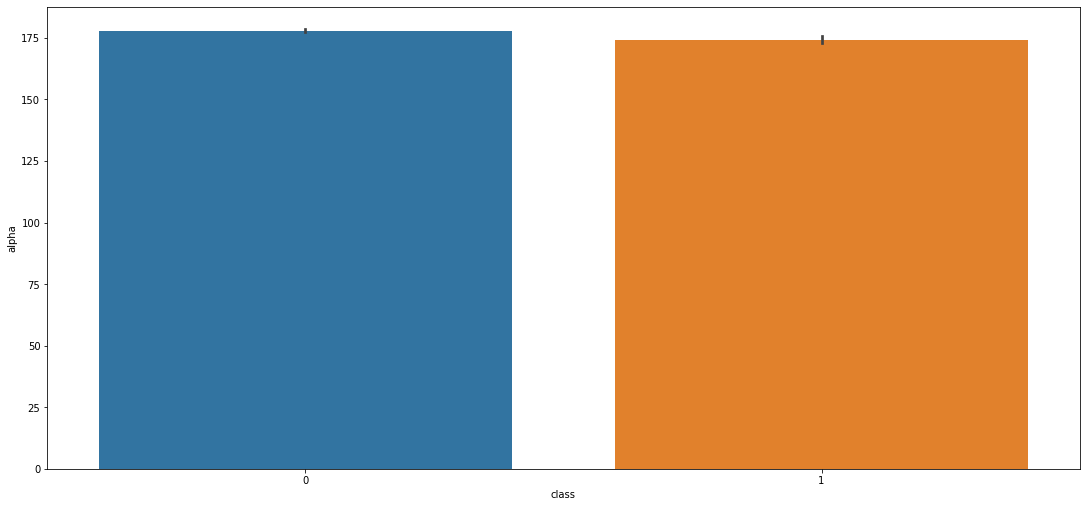

In [ ]:
sns.barplot(x='class',y='alpha',data=df)

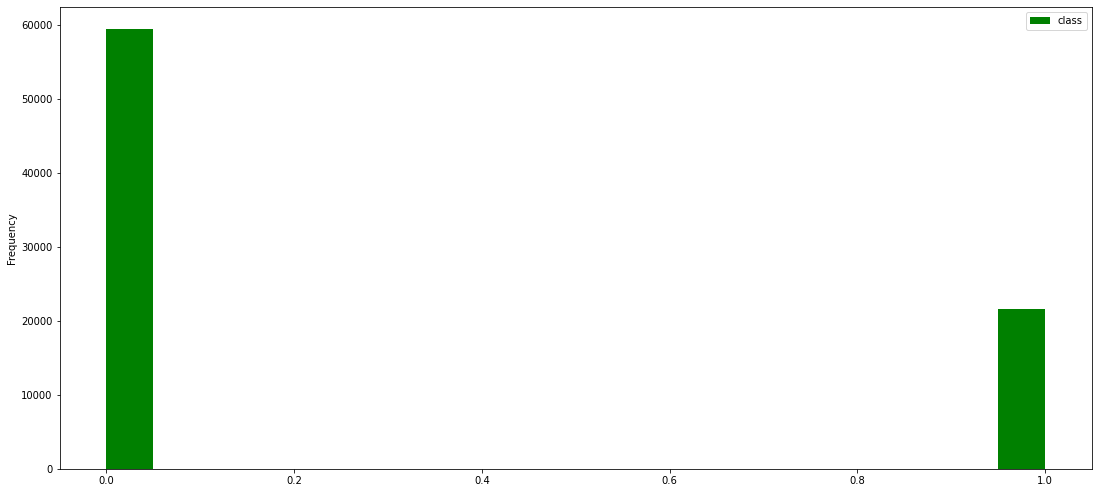

In [ ]:
df[['class']].plot.hist(bins = 20, color='Green')

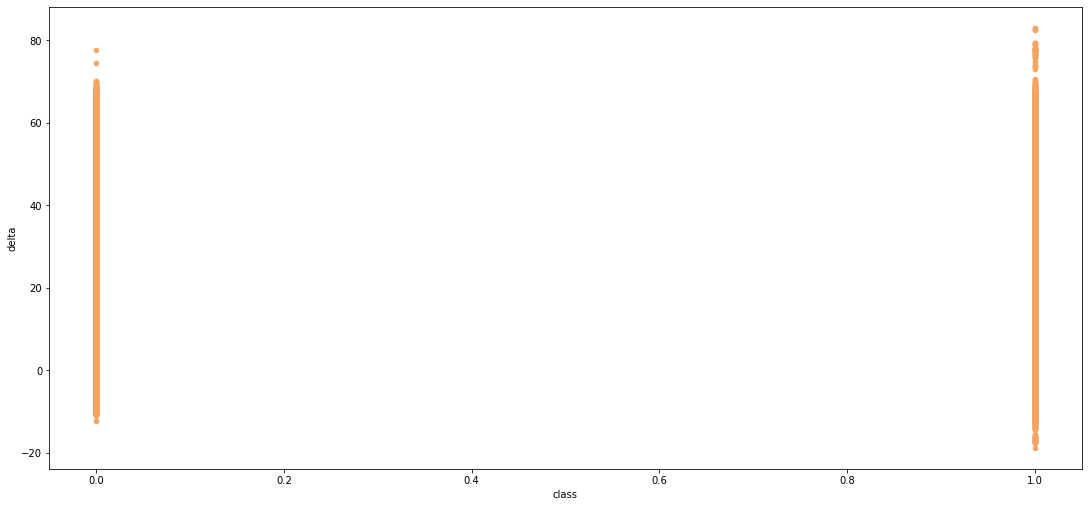

In [ ]:
df.plot.scatter(x = 'class', y = 'delta',
                  color = 'sandybrown')

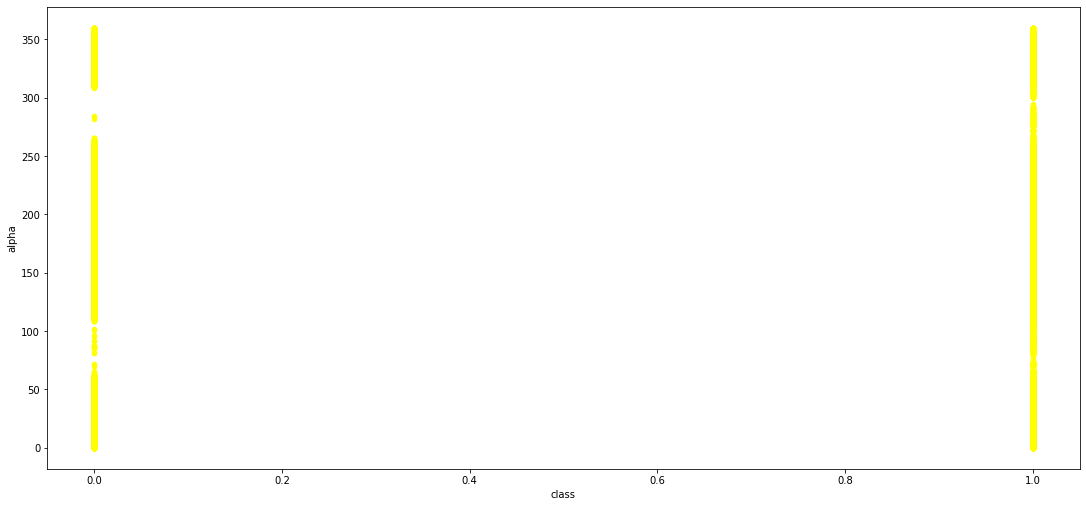

In [ ]:
df.plot.scatter(x = 'class', y = 'alpha',
                  color = 'Yellow')

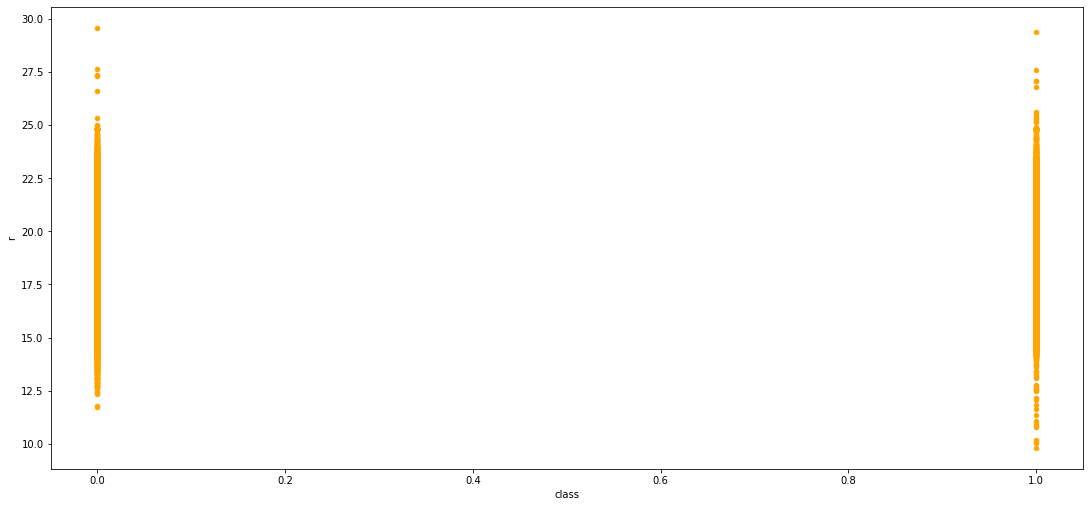

In [ ]:
df.plot.scatter(x = 'class', y = 'r',
                  color = 'Orange')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


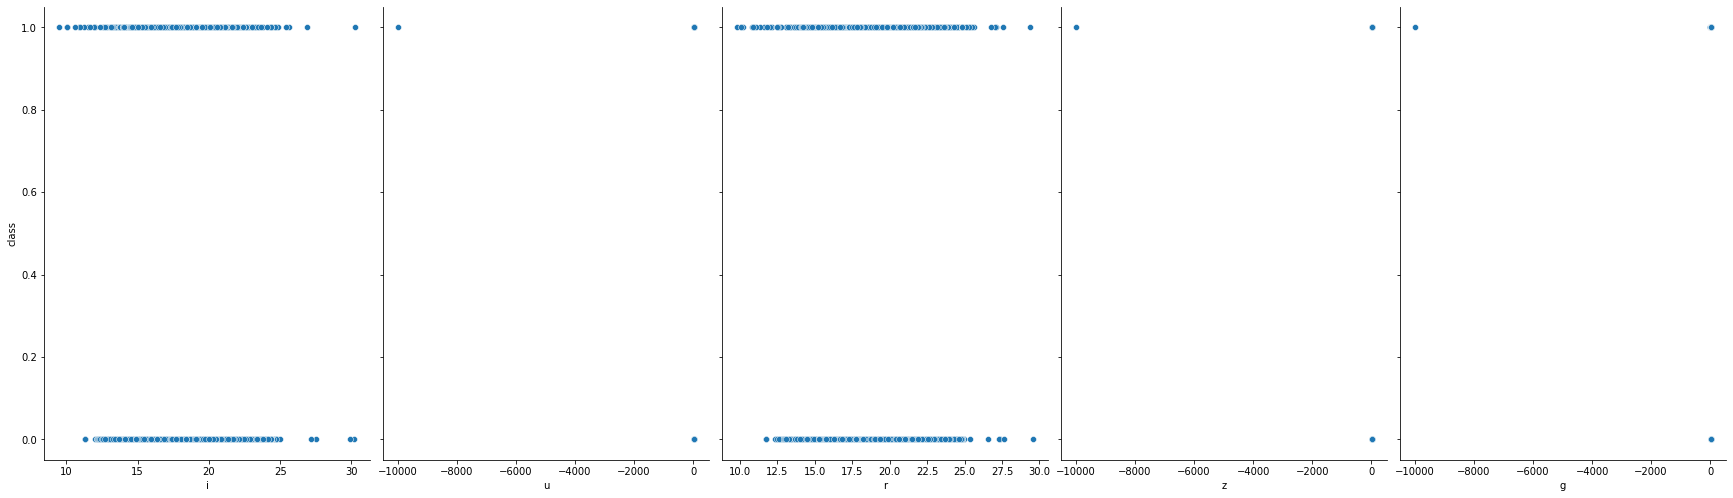

In [ ]:
sns.pairplot(df,x_vars=['i','u','r','z','g'],y_vars=['class'],size=7,aspect=0.7)

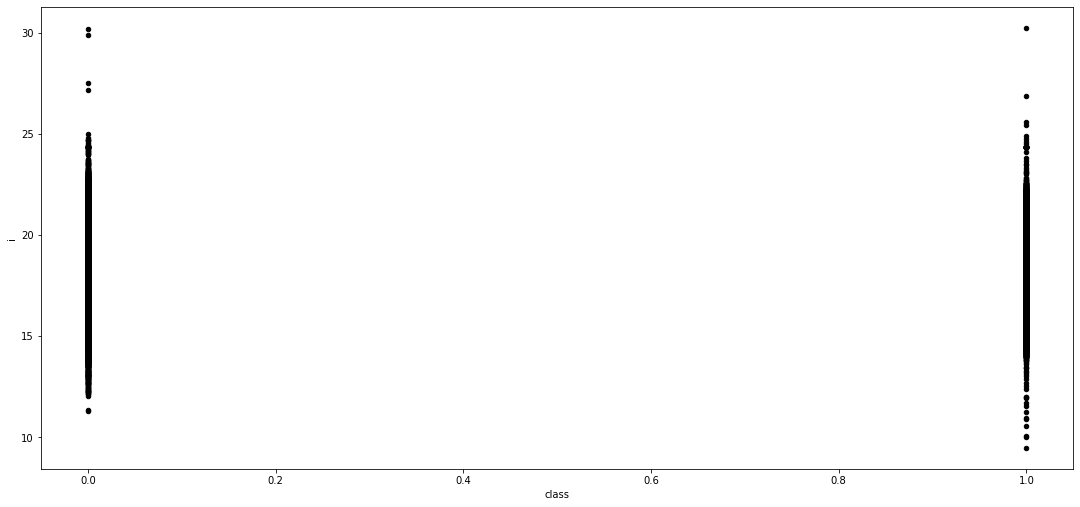

In [ ]:
df.plot.scatter(x = 'class', y = 'i',
                  color = 'Black')

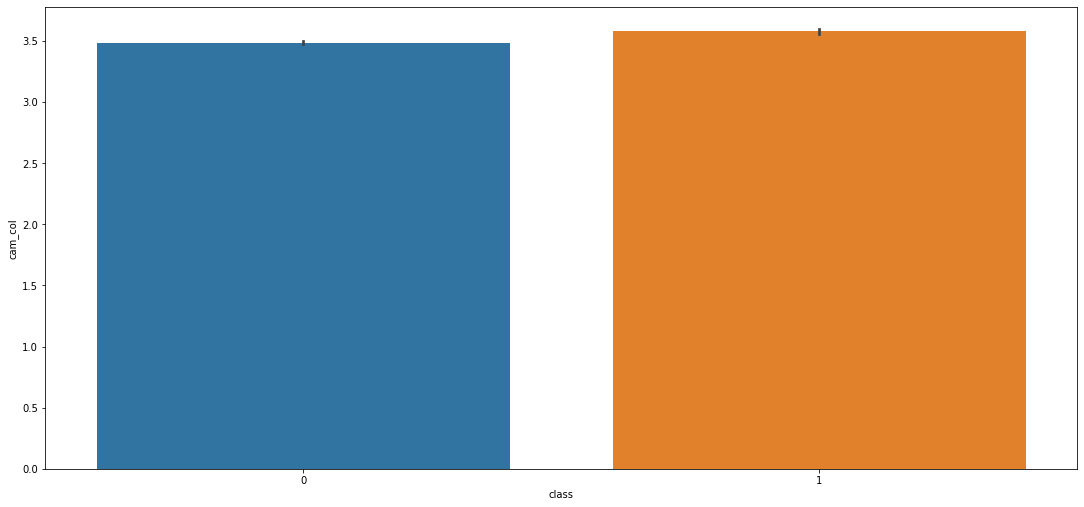

In [ ]:
sns.barplot(x='class',y='cam_col',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


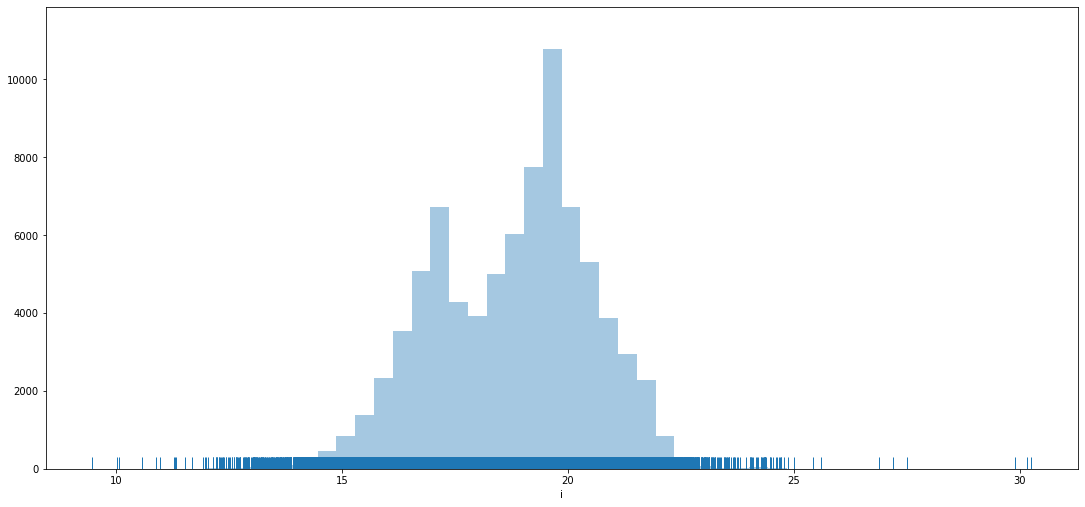

In [ ]:
sns.distplot(df["i"],kde=False,rug=True)

In [ ]:
def plot_violin(x, y):
    fig = plt.figure(figsize=(10, 7))
    sns.violinplot(x=x, y=y)
    plt.show()
    return

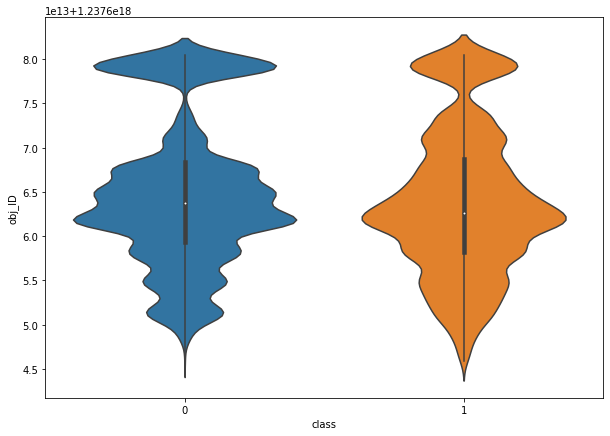

In [ ]:
plot_violin(x=df["class"], y=df["obj_ID"])

#SPLITTING DATA INTO DEPENDENT VARIABLE AND DEPENDENT VARIABLE

In [ ]:
X=df.drop(['class','obj_ID','rerun_ID'],axis=1)
print(X)
y=df['class']
print(y)

            alpha      delta         u         g         r         i  \
0      135.689107  32.494632  23.87882  22.27530  20.39501  19.16573   
1      144.826101  31.274185  24.77759  22.83188  22.58444  21.16812   
2      142.188790  35.582444  25.26307  22.66389  20.60976  19.34857   
3      338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454   
4      345.282593  21.183866  19.43718  17.58028  16.49747  15.97711   
...           ...        ...       ...       ...       ...       ...   
99995   39.620709  -2.594074  22.16759  22.97586  21.90404  21.30548   
99996   29.493819  19.798874  22.69118  22.38628  20.45003  19.75759   
99997  224.587407  15.700707  21.16916  19.26997  18.20428  17.69034   
99998  212.268621  46.660365  25.35039  21.63757  19.91386  19.07254   
99999  196.896053  49.464643  22.62171  21.79745  20.60115  20.00959   

              z  run_ID  cam_col  field_ID   spec_obj_ID  redshift  plate  \
0      18.79371    3606        2        79  6.543777e+18  

#SPLITTIND DATA INTO TRAIN AND TEST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=8)
X_train

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
20044,334.357882,2.244278,22.35601,23.12566,21.27909,20.01676,19.46290,7717,4,158,4.865260e+18,0.776398,4321,55504,895
36789,135.185976,33.201006,19.40688,17.47239,16.43795,16.00779,15.64682,3606,4,79,1.432219e+18,0.125311,1272,52989,270
79000,232.428570,54.793489,25.24002,22.25010,20.41323,19.33752,18.94117,1345,2,530,7.651641e+18,0.579781,6796,56453,91
35314,166.477372,42.050493,18.05455,16.90436,16.95361,17.03479,17.09954,3840,6,84,3.744834e+18,0.000362,3326,54943,329
93446,160.049741,40.146290,23.08436,21.29183,20.84652,20.57384,20.12383,3893,4,49,9.932904e+18,-0.000232,8822,58167,781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12947,345.411771,33.764196,23.58645,19.91617,18.45369,17.65476,17.10948,8156,4,154,7.324217e+18,-0.000184,6505,56560,866
76953,336.987845,17.528930,25.97289,22.16818,20.45760,19.56635,19.22461,8101,3,81,5.664572e+18,0.510432,5031,56209,615
22980,173.596119,33.352521,22.69651,22.29679,20.55480,19.72942,19.27039,4576,1,385,5.197328e+18,0.464397,4616,55617,631
32382,326.712668,-7.134109,19.43254,19.35940,19.28305,18.99306,18.86633,4828,1,566,1.325355e+18,0.000000,1177,52824,622


In [ ]:
y_train

20044    0
36789    0
79000    0
35314    1
93446    1
        ..
12947    1
76953    0
22980    0
32382    0
86699    0
Name: class, Length: 48623, dtype: int64

#LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_pred,y_test))

0.7288376110562685


In [ ]:
skl.mean_absolute_error(y_test,y_pred)

0.2711623889437315

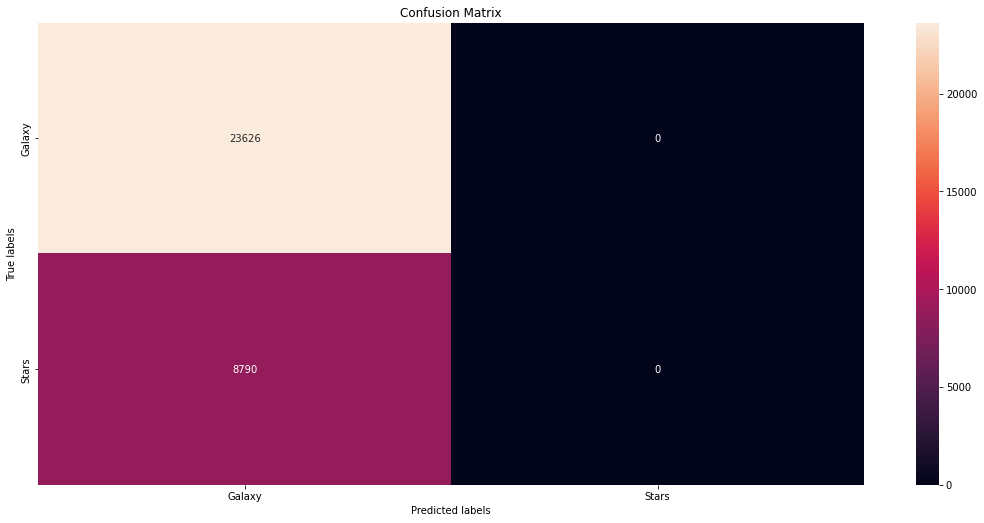

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

cm = confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Galaxy', 'Stars']); ax.yaxis.set_ticklabels(['Galaxy', 'Stars']);

#KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(metrics.accuracy_score(y_test,y_pred))


0.7288376110562685


#BAGGING

#RANDOM FOREST

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Classifier = RandomForestClassifier(n_estimators=100, random_state=0)
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 0.00391781836130306


In [ ]:
Classifier.score(X_test,y_test)

0.996082181638697

#BOOSTING

Adaptive Boosting

In [ ]:
#Adaboosting
from sklearn.ensemble import AdaBoostClassifier

adaclf = AdaBoostClassifier( 
                            n_estimators=100,
                            learning_rate=0.1,
                            random_state=42)
adaclf.fit(X_train,y_train)
y_pred_1 = adaclf.predict(X_test)
ab=mean_absolute_error(y_test, y_pred_1)
print(ab)

0.00604639684106614


In [ ]:
adaclf.score(X_test,y_test)

0.9939536031589339

Gradient Boosting

In [ ]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error

In [ ]:
#Gradient boosting
classifier1 = GradientBoostingClassifier(max_depth=4,n_estimators=15,learning_rate=0.1,random_state=0)
classifier1.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=15, random_state=0)

In [ ]:
y_pred = classifier1.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.001388203356367226

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7288376110562685

Extreme Gradient Boosting


In [ ]:
#ExtremeGradient Boosting
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100,
                   learning_rate=0.1,
                   random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
eg=mean_absolute_error(y_test, y_pred)
print(eg)

0.0013573543928923988


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9986426456071076

#NEURAL NETWORK

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(17, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model
history= model.fit(X_train, y_train, epochs=20)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
1520/1520 [==============================] - 4s 2ms/step - loss: 0.5910 - accuracy: 0.7252 - precision: 0.2816 - a=recall: 0.0280
Epoch 2/20
1520/1520 [==============================] - 3s 2ms/step - loss: 0.4414 - accuracy: 0.8227 - precision: 0.8155 - a=recall: 0.4221
Epoch 3/20
1520/1520 [==============================] - 3s 2ms/step - loss: 0.1746 - accuracy: 0.9596 - precision: 0.9031 - a=recall: 0.9482
Epoch 4/20
1520/1520 [==============================] - 3s 2ms/step - loss: 0.1103 - accuracy: 0.9748 - precision: 0.9318 - a=recall: 0.9756
Epoch 5/20
1520/1520 [==============================] - 3s 2ms/step - loss: 0.0836 - accuracy: 0.9817 - precision: 0.9458 - a=recall: 0.9870
Epoch 6/20
1520/1520 [==============================] - 3s 2ms/step - loss: 0.0704 - accuracy: 0.9844 - precision: 0.9523 - a=recall: 0.9904
Epoch 7/20
1520/1520 [==============================] - 3s 2ms/step - loss: 0.0632 - accuracy: 0.9857 - precision: 0.9560 - a=recall: 0.9913
Epoch 8/20
15